In [1]:
%%markdown

# AI Apps Project: "Bank Marketing Campaign"
## Norberti Simone && Genovasi Francesco


# AI Apps Project: "Bank Marketing Campaign"
## Norberti Simone && Genovasi Francesco


In [2]:
import pandas as pd
def load_bank_data(): 
    csv_path = "bank.csv"
    return pd.read_csv(csv_path)

bank = load_bank_data()
print("bank.shape:", bank.shape)
print("First 5 rows:")
bank.head()

bank.shape: (11162, 17)
First 5 rows:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
bank.describe() # solo dati numerici

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


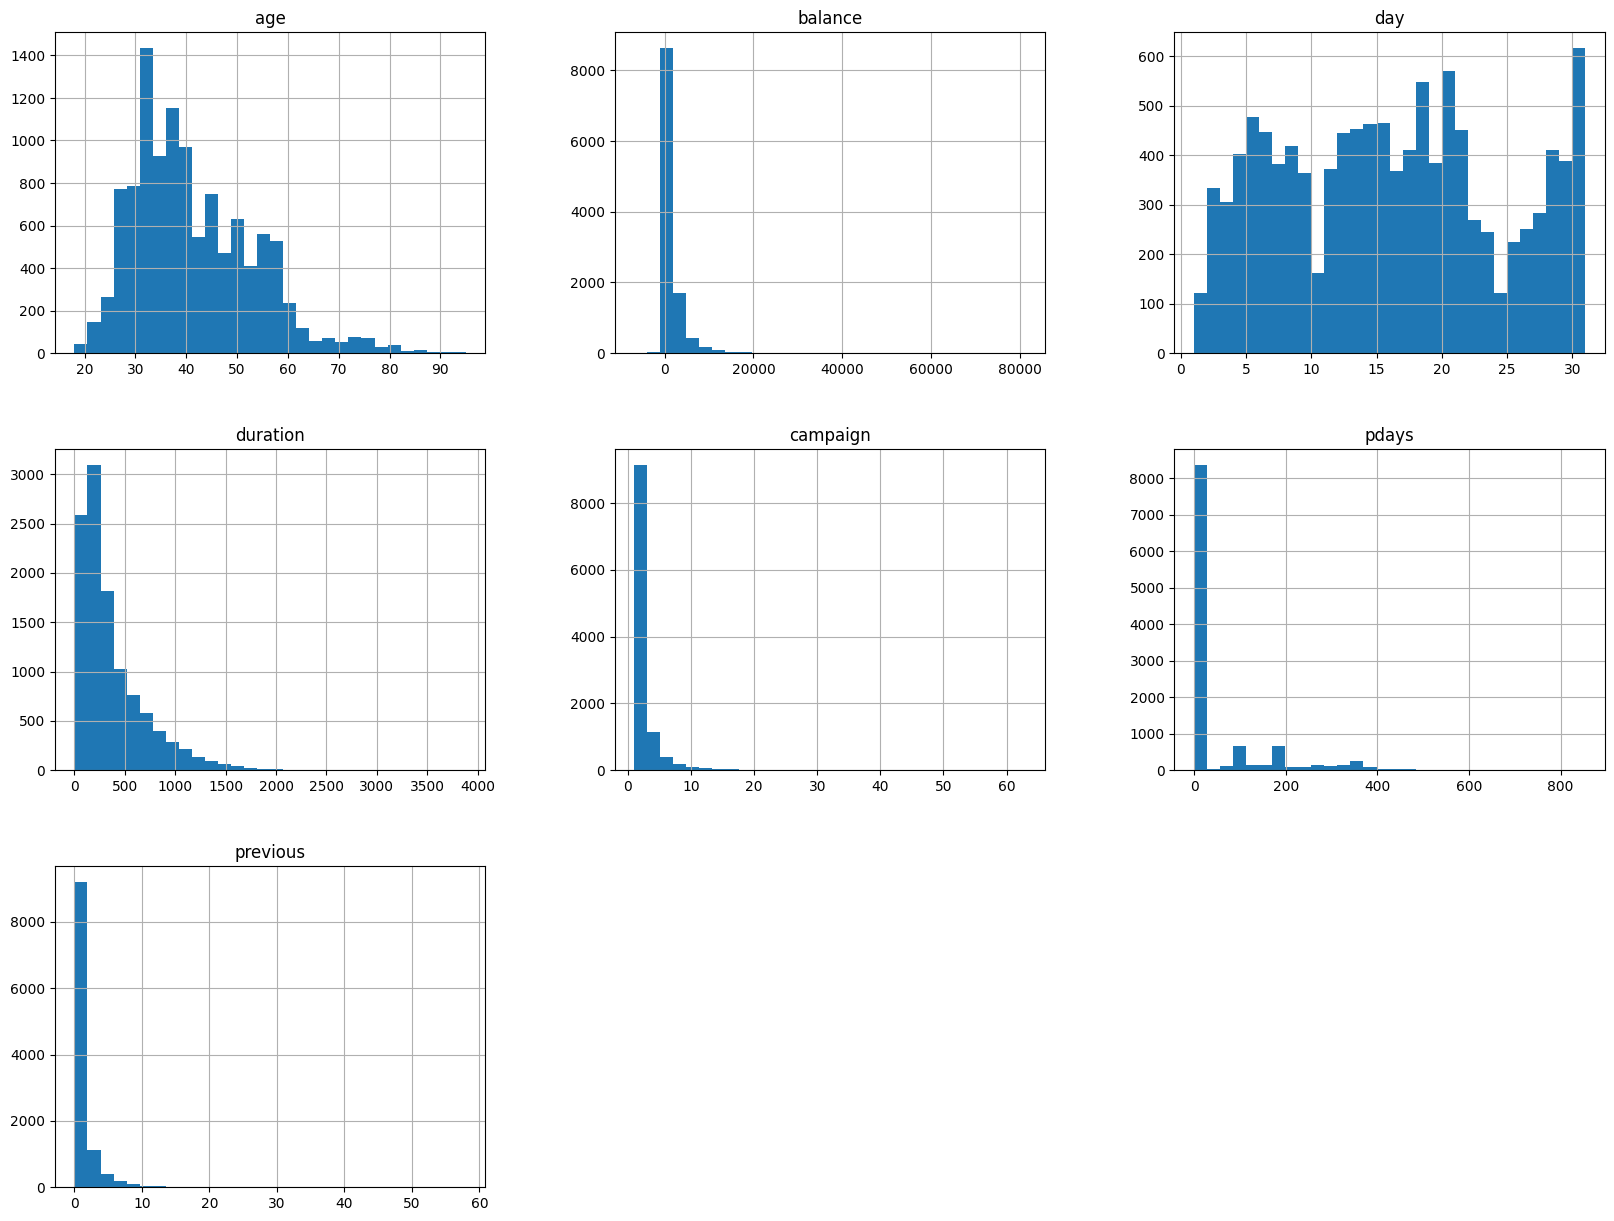

In [5]:
import matplotlib.pyplot as plt
bank.hist(bins=30, figsize=(20,15))
plt.show()
# vengono mostrati gli istogrammi solo di dati numerici

In [6]:
bank["job"].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [7]:
bank["marital"].value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [8]:
bank["education"].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [9]:
bank["default"].value_counts()

no     10994
yes      168
Name: default, dtype: int64

In [10]:
bank["housing"].value_counts()

no     5881
yes    5281
Name: housing, dtype: int64

In [11]:
bank["loan"].value_counts()

no     9702
yes    1460
Name: loan, dtype: int64

In [12]:
bank["contact"].value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [13]:
bank["month"].value_counts()

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64

In [14]:
bank["poutcome"].value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [15]:
bank["deposit"].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [16]:
bank_with_id = bank.reset_index() # adds an `index` column

In [17]:
bank_with_id.head()

,index,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(bank, bank["deposit"]):
    strat_train_set = bank.loc[train_index]
    strat_test_set = bank.loc[test_index]

In [19]:
bank["deposit"].value_counts()/len(bank)

no     0.52616
yes    0.47384
Name: deposit, dtype: float64

In [20]:
strat_train_set["deposit"].value_counts()/len(strat_train_set)

no     0.526151
yes    0.473849
Name: deposit, dtype: float64

In [21]:
strat_test_set["deposit"].value_counts()/len(strat_test_set)

no     0.526198
yes    0.473802
Name: deposit, dtype: float64

In [22]:
%%markdown
### Valori null: scegliere tra questi 3 approcci: median, drop attr, drop rows
### If there were missing values we will have to fill them with the median, mean or mode.

### Valori null: scegliere tra questi 3 approcci: median, drop attr, drop rows
### If there were missing values we will have to fill them with the median, mean or mode.


In [23]:
num_attribs = ["age", "balance","day","duration","campaign","pdays", "previous"]
cat_attribs = ["job", "marital", "education", "default", "housing", "loan",
              "contact", "month", "poutcome", "deposit"]

bank_num = strat_train_set.drop(cat_attribs, axis=1)
bank_tr = pd.DataFrame(bank_num, columns=bank_num.columns)

In [24]:
bank_tr.describe()

,age,balance,day,duration,campaign,pdays,previous
count,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.00000,8929.000000
mean,41.106731,1482.312577,15.683503,369.998320,2.503192,51.79449,0.829768
std,11.876074,2975.334928,8.429058,345.956932,2.783684,109.07726,2.331394
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.00000,0.000000
25%,32.000000,122.000000,8.000000,137.000000,1.000000,-1.00000,0.000000
50%,39.000000,552.000000,15.000000,253.000000,2.000000,-1.00000,0.000000
75%,49.000000,1694.000000,22.000000,492.000000,3.000000,38.00000,1.000000
max,95.000000,81204.000000,31.000000,3284.000000,63.000000,854.00000,58.000000


In [25]:
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

numerical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        #('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
     ])

bank_num_tr = numerical_pipeline.fit_transform(bank_num)
bank_num_tr_df = pd.DataFrame(bank_num_tr, columns=num_attribs)

In [26]:
bank_num_tr[0]

array([ 0.41205057, -0.32143142,  1.81720843, -0.34398786,  0.17848144,
       -0.48403716, -0.35593062])

In [27]:
'''
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

num_attribs = ["age", "balance","day","duration","campaign","pdays", "previous"]
cat_attribs = ["job", "marital", "education", "default", "housing", "loan",
              "contact", "month", "poutcome", "deposit"]
     
full_pipeline = ColumnTransformer([
    ("num", numerical_pipeline, num_attribs),
    ("cat", OrdinalEncoder(), cat_attribs),
])

bank_prepared = full_pipeline.fit_transform(strat_train_set)
bank_prepared[0]
'''

'\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.preprocessing import OrdinalEncoder\n\nnum_attribs = ["age", "balance","day","duration","campaign","pdays", "previous"]\ncat_attribs = ["job", "marital", "education", "default", "housing", "loan",\n              "contact", "month", "poutcome", "deposit"]\n     \nfull_pipeline = ColumnTransformer([\n    ("num", numerical_pipeline, num_attribs),\n    ("cat", OrdinalEncoder(), cat_attribs),\n])\n\nbank_prepared = full_pipeline.fit_transform(strat_train_set)\nbank_prepared[0]\n'

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

num_attribs = ["age", "balance","day","duration","campaign","pdays", "previous"]
bin_attribs = ["default", "housing", "loan", "deposit"]
cat_attribs = ["job", "marital", "education", "contact", "month", "poutcome"]
     
full_pipeline = ColumnTransformer([
    ("num", numerical_pipeline, num_attribs),
    ("bin", OrdinalEncoder(), bin_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

bank_prepared = full_pipeline.fit_transform(strat_train_set)
bank_prepared[0]

array([ 0.41205057, -0.32143142,  1.81720843, -0.34398786,  0.17848144,
       -0.48403716, -0.35593062,  0.        ,  0.        ,  1.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ])

In [29]:
full_pipeline.named_transformers_['cat'].categories_

[array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'unknown'], dtype=object),
 array(['divorced', 'married', 'single'], dtype=object),
 array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object),
 array(['cellular', 'telephone', 'unknown'], dtype=object),
 array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
        'nov', 'oct', 'sep'], dtype=object),
 array(['failure', 'other', 'success', 'unknown'], dtype=object)]

In [30]:
cat_onehot = ['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 
              'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 
              'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 
              'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 
              'contact_cellular', 
              'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 
              'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 
              'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']
attrs = num_attribs + bin_attribs + cat_onehot
bank_prepared_df = pd.DataFrame(bank_prepared, columns=attrs)

In [31]:
bank_prepared_df.head()

,age,balance,day,duration,campaign,pdays,previous,default,housing,loan,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.412051,-0.321431,1.817208,-0.343988,0.178481,-0.484037,-0.355931,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.412051,0.359538,-1.504820,-0.317972,-0.540031,0.386954,3.075684,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-1.356310,-0.451508,-0.555669,-0.485632,-0.540031,0.359449,0.073021,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.159428,0.606919,0.630770,1.170736,0.178481,-0.484037,-0.355931,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.345818,-0.425291,0.868057,-0.283283,-0.180775,-0.484037,-0.355931,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [32]:
corr_matrix = bank_num_tr_df.corr()
corr_matrix["age"].sort_values(ascending=False)

age         1.000000
balance     0.104223
previous    0.016231
pdays       0.001621
duration   -0.001344
day        -0.003698
campaign   -0.005213
Name: age, dtype: float64

In [33]:
corr_matrix = bank_prepared_df.corr()
corr_matrix["deposit"].sort_values(ascending=False)

deposit                1.000000
duration               0.449007
poutcome_success       0.286986
contact_cellular       0.224146
pdays                  0.149877
previous               0.134048
month_oct              0.131967
month_mar              0.131394
month_sep              0.122006
job_student            0.109154
job_retired            0.098538
marital_single         0.094348
month_apr              0.094224
education_tertiary     0.092852
balance                0.091647
month_dec              0.089059
poutcome_other         0.049991
month_feb              0.040853
age                    0.031890
job_management         0.030436
job_unemployed         0.029388
education_unknown      0.017948
poutcome_failure       0.015661
contact_telephone      0.015596
job_admin.             0.003769
marital_divorced       0.002026
job_unknown           -0.001701
job_technician        -0.007737
month_aug             -0.010761
job_self-employed     -0.011459
month_jun             -0.011557
month_ja

AttributeError: AxesImage.set() got an unexpected keyword argument 'ccmap'

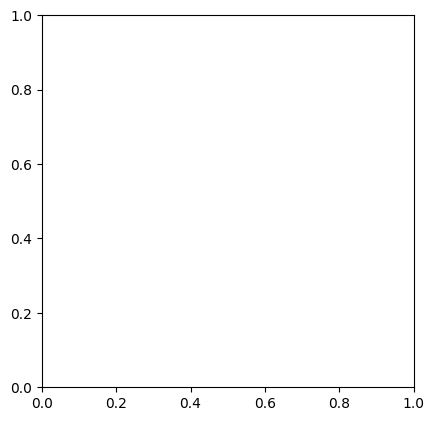

In [38]:
plt.matshow(corr_matrix, ccmap='hot')

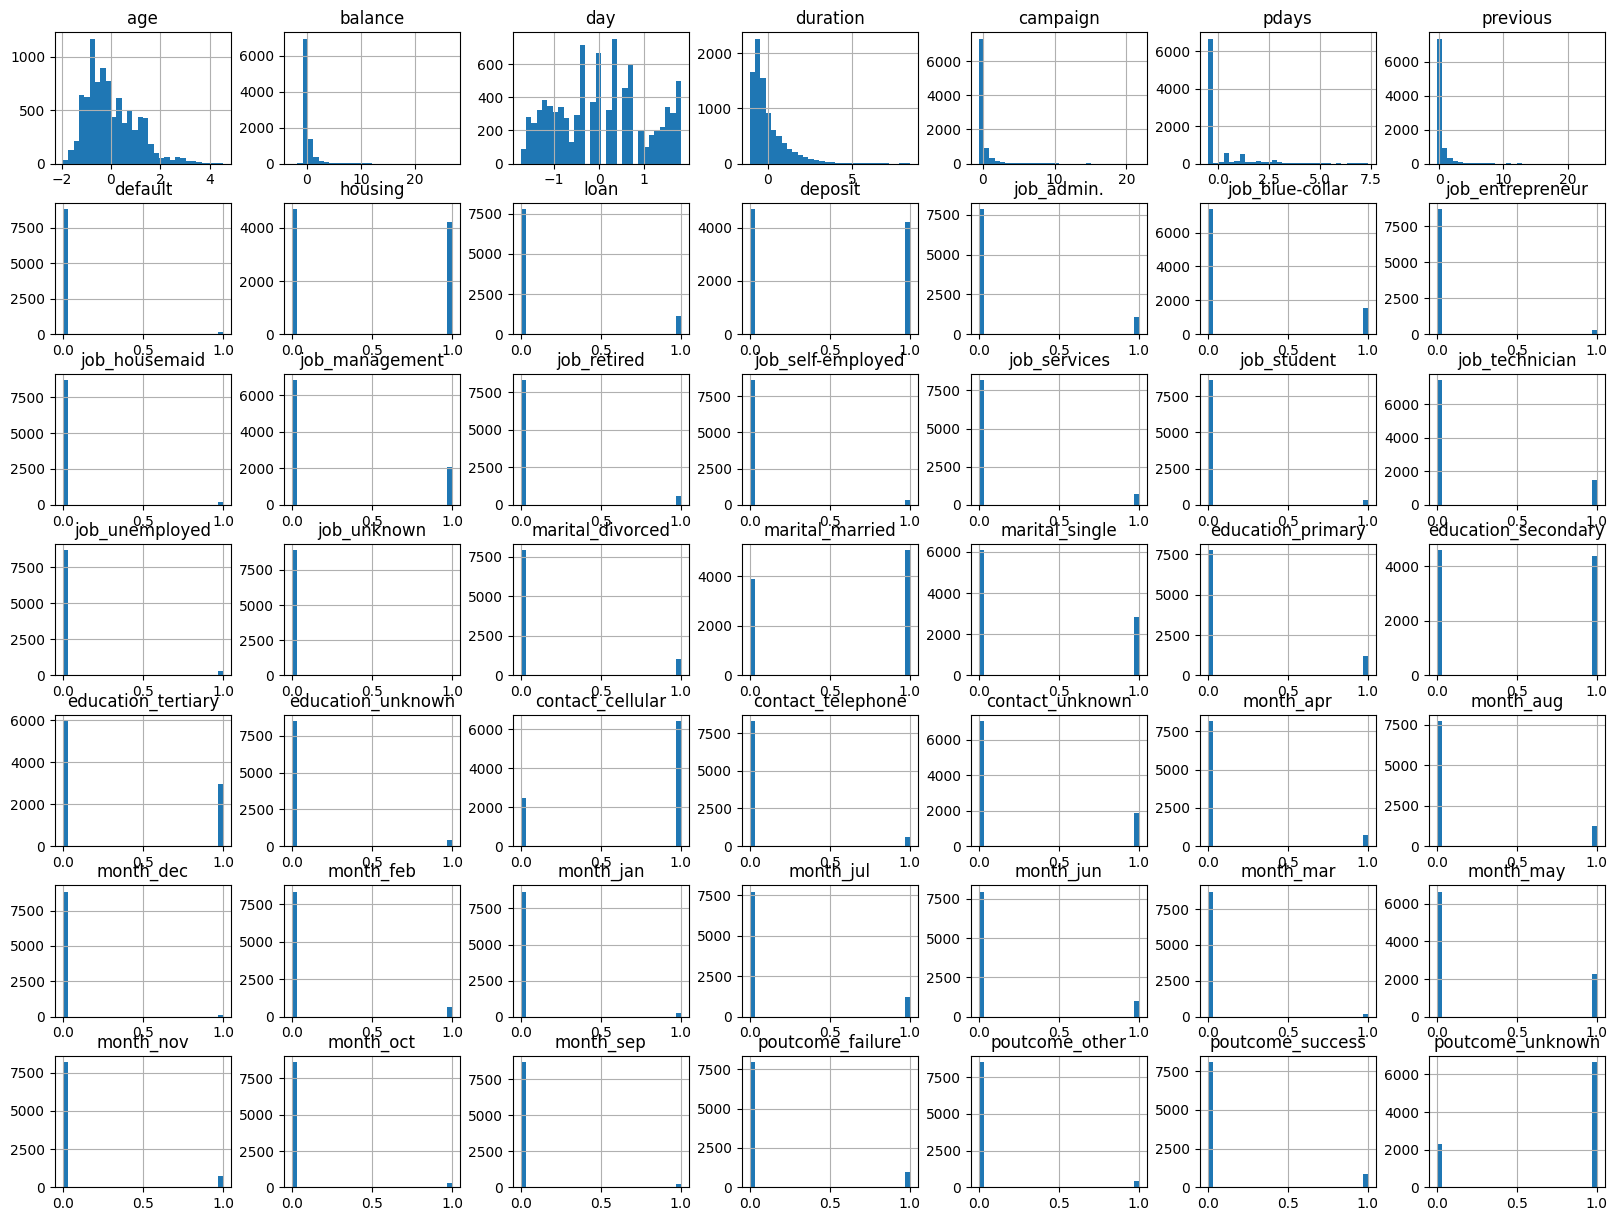

In [34]:
import matplotlib.pyplot as plt
bank_prepared_df.hist(bins=30, figsize=(20,15))
plt.show()

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='balance', ylabel='age'>,
        <Axes: xlabel='day', ylabel='age'>, ...,
        <Axes: xlabel='poutcome_other', ylabel='age'>,
        <Axes: xlabel='poutcome_success', ylabel='age'>,
        <Axes: xlabel='poutcome_unknown', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='balance'>,
        <Axes: xlabel='balance', ylabel='balance'>,
        <Axes: xlabel='day', ylabel='balance'>, ...,
        <Axes: xlabel='poutcome_other', ylabel='balance'>,
        <Axes: xlabel='poutcome_success', ylabel='balance'>,
        <Axes: xlabel='poutcome_unknown', ylabel='balance'>],
       [<Axes: xlabel='age', ylabel='day'>,
        <Axes: xlabel='balance', ylabel='day'>,
        <Axes: xlabel='day', ylabel='day'>, ...,
        <Axes: xlabel='poutcome_other', ylabel='day'>,
        <Axes: xlabel='poutcome_success', ylabel='day'>,
        <Axes: xlabel='poutcome_unknown', ylabel='day'>],
       ...,
       [<Axes: xlabel='age', yl

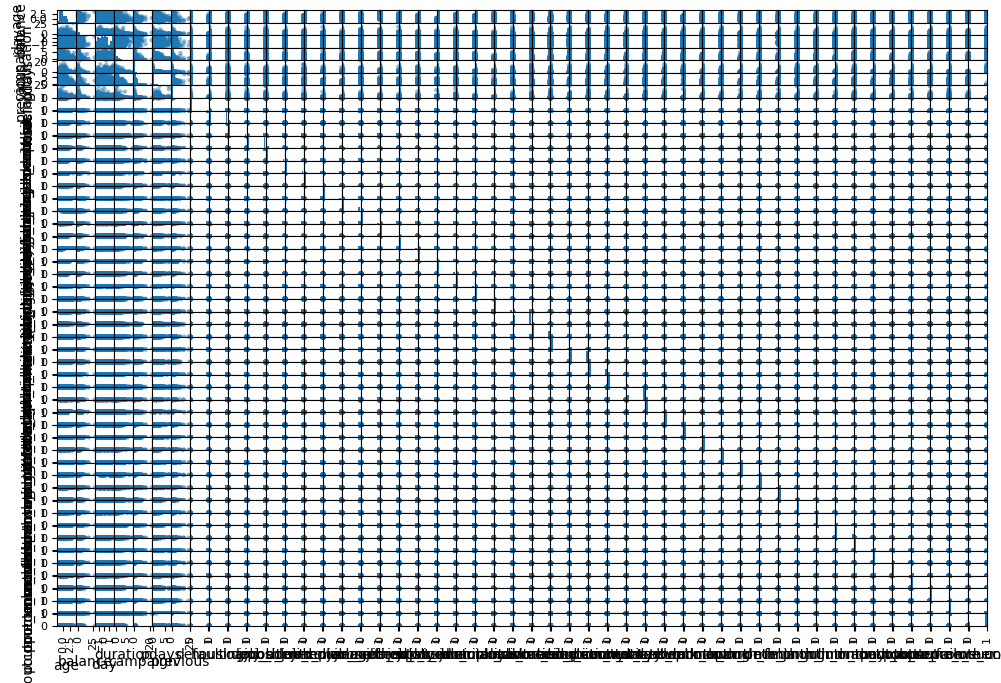

In [35]:
from pandas.plotting import scatter_matrix

scatter_matrix(bank_prepared_df[attrs], figsize=(12, 8))

<Axes: xlabel='age', ylabel='deposit'>

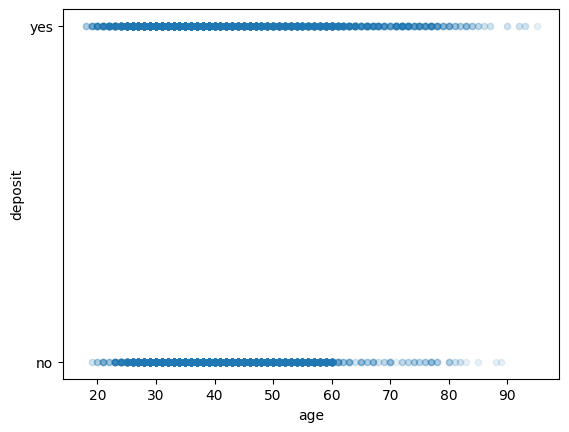

In [36]:
strat_train_set.plot(kind="scatter", x = "age", y = "deposit", alpha = 0.1) #, s="age"

In [37]:
bank_prepared_df_temp = bank_prepared_df[bank_prepared_df['poutcome'] != 3] # unknown
bank_prepared_df_temp

KeyError: 'poutcome'

In [ ]:
corr_matrix = bank_prepared_df_temp.corr()
corr_matrix["deposit"].sort_values(ascending=False)

In [ ]:
bank_prepared_df.plot(kind="scatter", x="poutcome", y="deposit", alpha = 0.1, s="poutcome")